## Data Science and Business Analytics

## The Sparks Foundation

## Author : Navjot Kaur

#### Internship
#### Prediction using Supervised ML
#### Task 1 -  Predict the percentage of an student based on the no. of study hours. 

In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## data importing with pandas library.
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Exploring the data 

Text(0.5, 1.0, 'Hours vs percentage ')

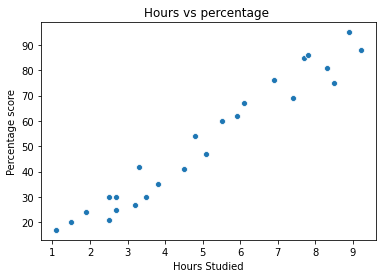

In [4]:
# we plot the variables , so the relationship they have.
# as we draw the Scatter plot with Seaborn library
# we can see that both the variables are moving in same direction, 
# or we can say that both the variables are higly correlated which we will see later

sns.scatterplot(x = 'Hours', y = 'Scores', data= df)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage score')
plt.title('Hours vs percentage ')

###### we can conclude from graph that the vaiables are moving in the same direction, as the no. of hours increases the number of score also increases.

### **Preparing the data**

- Declare the independent and dependent variables for model building
- as we have to predict the score of the students, which depend on hours of study they do 
- so we get to know that X is the independent variable('Hours')
- and y is the dependent variable('Scores') which is depend on X

In [5]:
X = df.iloc[:, :-1].values  # independent variable 
y = df.iloc[:, 1].values  # dependent variable

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

spliting the data means one data for making the model and test the data.

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [7]:
## for trainig the data we export the LinearRegression from sklearn library
## we fit the trained data into the model
## Note:- we always fit the train data set 

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
## intercept- it is the y intercept, which means the minimum marks score by the students
regressor.intercept_


3.6085083546066343

In [9]:
## coefficent :- it is the slope of the parameter X, which shows at what rate the X('Hours') changes 
regressor.coef_


array([9.76488164])

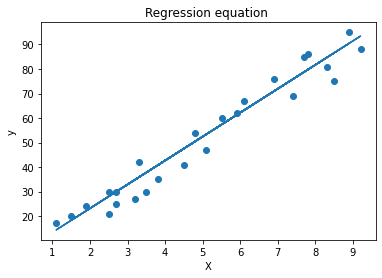

In [10]:
## know we will draw the regression line
## As we know the regression equation is 

## Y= b +b1(X)+ e,
## b1 = coefficient, b= intercept,e = error term

line = regressor.intercept_+regressor.coef_*X

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression equation ')
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [17]:
## know we make prediction on the test data

y_pred = regressor.predict(X_test) # Predicting the scores
y_pred

array([29.97368879, 37.78559411, 40.7150586 , 53.40940473, 75.86863251])

In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,30,29.973689
1,30,37.785594
2,35,40.715059
3,47,53.409405
4,69,75.868633


In [13]:
Error = df['Actual']- df['Predicted']
Error

0    0.026311
1   -7.785594
2   -5.715059
3   -6.409405
4   -6.868633
dtype: float64

In [14]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.93366355302854


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.361000232072408


In [16]:
## R Square will tell us how efficent our model will work

print('R_Square: ', regressor.score(X,y))

R_Square:  0.9510815608804165
